Import bibliotek i przygotowanie danych

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv("heart.csv")

df = pd.get_dummies(df, drop_first=True)


X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Analiza danych

In [ ]:
print("=" * 60)
print("DATA PREVIEW")
print("=" * 60)
print("\n📋 First 5 rows:")
display(df.head())

print("\n📋 Last 5 rows:")
display(df.tail())

DATA PREVIEW

📋 First 5 rows:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True



📋 Last 5 rows:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False
917,38,138,175,0,173,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isna().sum().values,
    'Missing %': (df.isna().sum().values / len(df) * 100).round(2),
    'Present Count': df.notna().sum().values,
    'Present %': (df.notna().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data.sort_values('Missing %', ascending=False)
missing_data.index = range(1, len(missing_data) + 1)

if missing_data['Missing Count'].sum() > 0:
  print("\n⚠️ Columns with Missing Values:")
  display(missing_data[missing_data['Missing Count'] > 0])
else:
  print("\n✅ No Missing Values found in the dataset!")

display(missing_data)

MISSING VALUES ANALYSIS

✅ No Missing Values found in the dataset!


,Column,Missing Count,Missing %,Present Count,Present %
1,Age,0,0.0,918,100.0
2,RestingBP,0,0.0,918,100.0
3,Cholesterol,0,0.0,918,100.0
4,FastingBS,0,0.0,918,100.0
5,MaxHR,0,0.0,918,100.0
6,Oldpeak,0,0.0,918,100.0
7,HeartDisease,0,0.0,918,100.0
8,Sex_M,0,0.0,918,100.0
9,ChestPainType_ATA,0,0.0,918,100.0
10,ChestPainType_NAP,0,0.0,918,100.0


<Axes: >

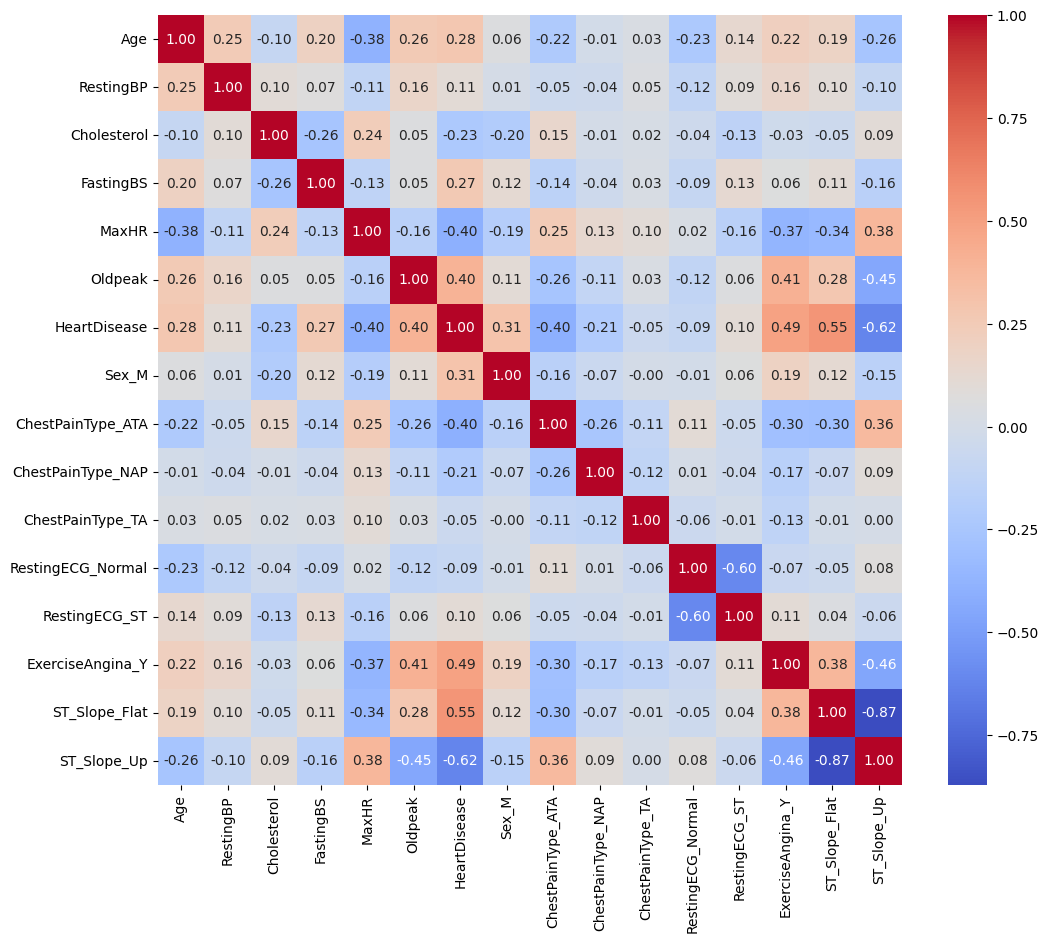

In [ ]:
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

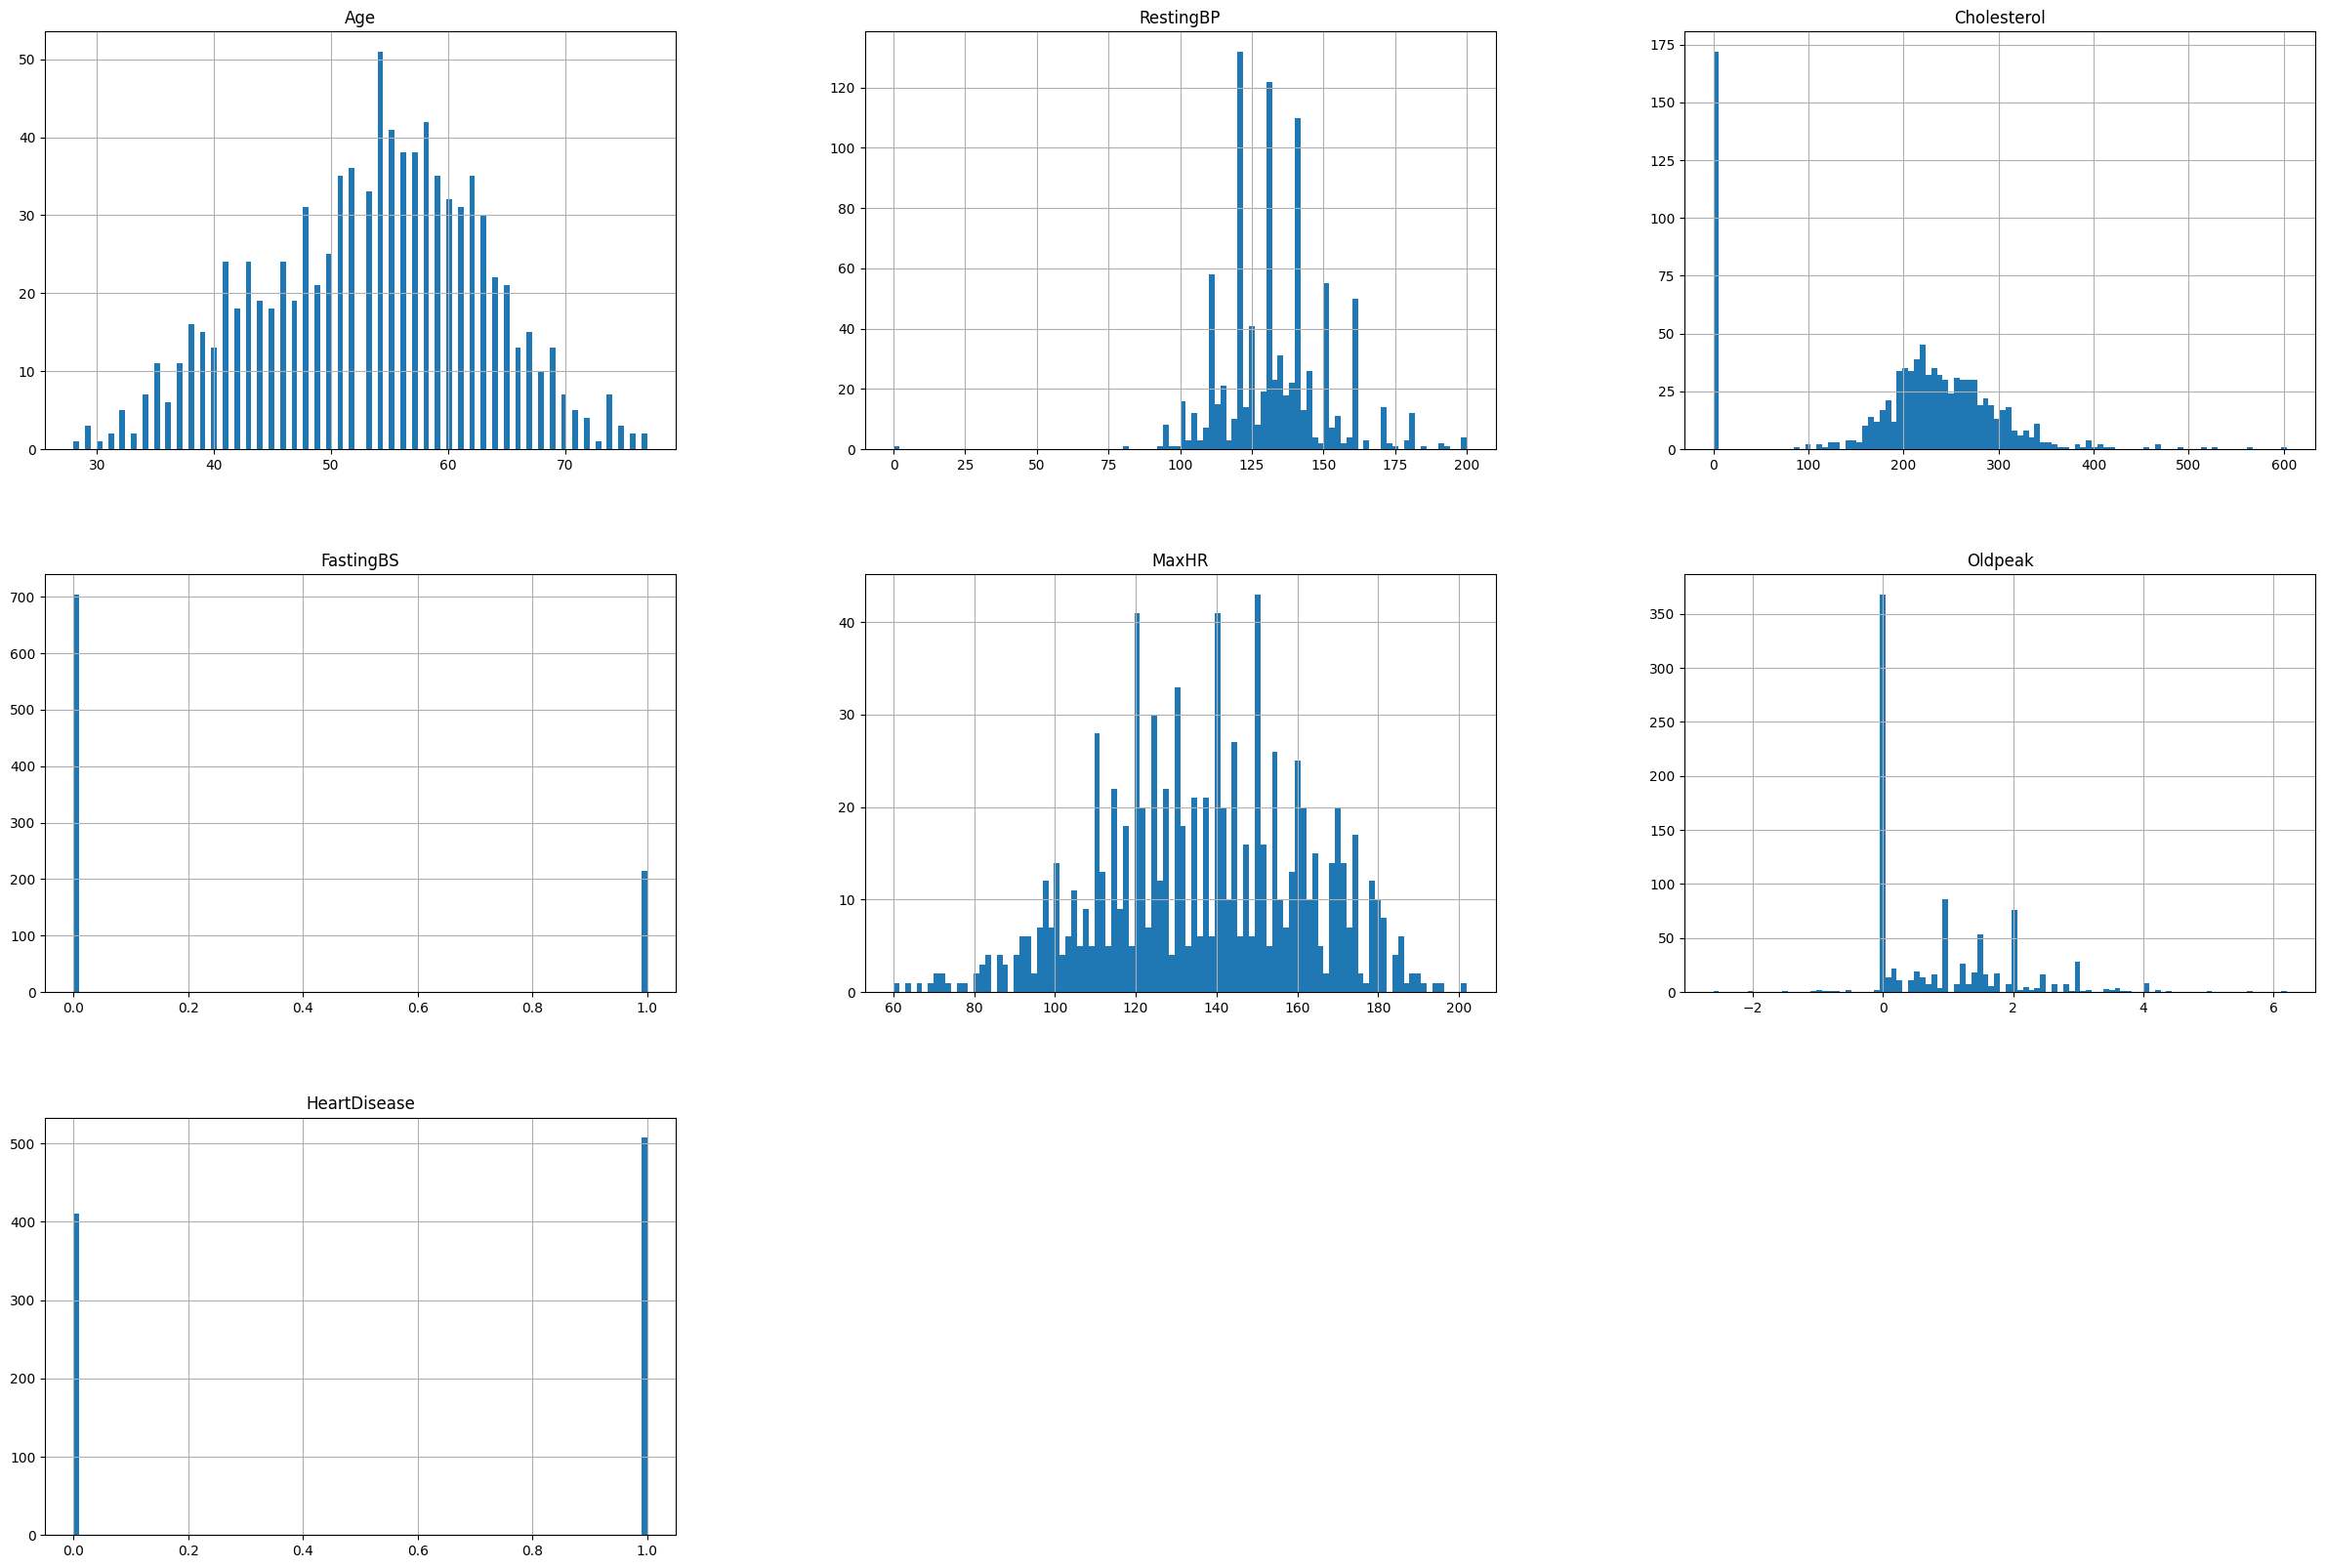

In [ ]:
df.hist(bins=100, figsize=(30, 20))

Budowa modelu sieci neuronowej

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

Trenowanie sieci

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5672 - loss: 0.6921 - val_accuracy: 0.7687 - val_loss: 0.5657
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8517 - loss: 0.5105 - val_accuracy: 0.8231 - val_loss: 0.4584
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8438 - loss: 0.4101 - val_accuracy: 0.8231 - val_loss: 0.4085
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8747 - loss: 0.3561 - val_accuracy: 0.8231 - val_loss: 0.3916
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8745 - loss: 0.3469 - val_accuracy: 0.8435 - val_loss: 0.3864
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8653 - loss: 0.3320 - val_accuracy: 0.8503 - val_loss: 0.3864
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.2709 - val_accuracy: 0.8639 - val_loss: 0.3811
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8858 - loss: 0.3007 - val_accuracy: 0.8571 - val_loss

Wizualizacja wyników

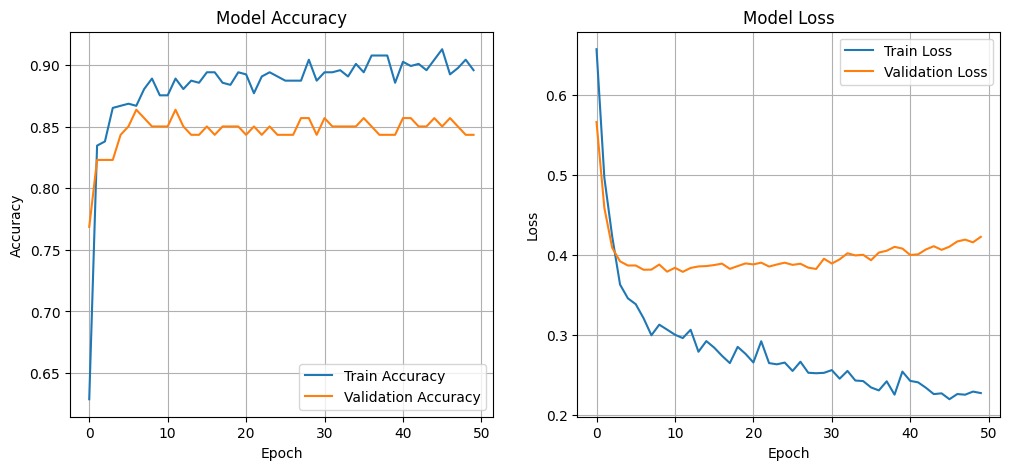

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

Macierz pomyłek

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


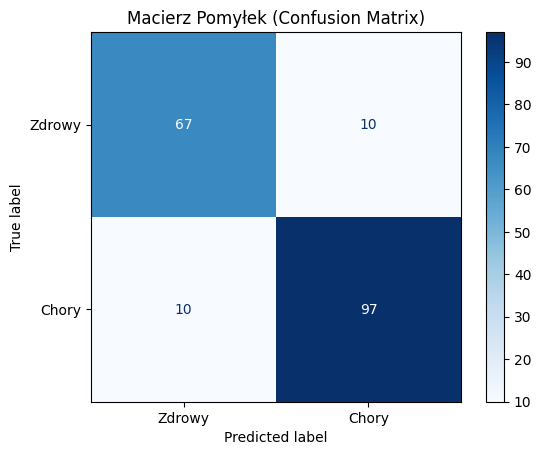

Ilość wszystkich testowanych pacjentów: 184


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


predictions = model.predict(X_test_scaled)

predictions_binary = (predictions > 0.5).astype(int)

cm = confusion_matrix(y_test, predictions_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Zdrowy', 'Chory'])
disp.plot(cmap='Blues')
plt.title("Macierz Pomyłek (Confusion Matrix)")
plt.show()

print(f"Ilość wszystkich testowanych pacjentów: {len(y_test)}")

Chcemy spełnić wymóg projektowy (Przeprowadzenie serii eksperymentów maj¡cych na celu ustalenie optymalnej struktury i konfiguracji sieci), wiec, porównujemy nasz model z dwoma skrajnymi przypadkami, aby udowodnić w raporcie, że nasza konfiguracja jest najlepsza.
TESTOWANE SCENARIUSZE:
1. Model Prosty (Underfitting) - za płytka sieć, żeby pokazać niedouczenie.
2. Model Złożony (Overfitting) - duża sieć bez Dropoutu, żeby pokazać przeuczenie.
3. Model Optymalny (Nasz) - obecna wersja z Dropoutem i skalowaniem.

Trenowanie: Prosty (Underfitting)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- WYNIKI DLA: Prosty (Underfitting) ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.76      0.83      0.80        77
           1       0.87      0.81      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

Trenowanie: Złożony (Overfitting)...



--- WYNIKI DLA: Złożony (Overfitting) ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Trenowanie: Optymalny (Nasz)...

--- WYNIKI DLA: Optymalny (Nasz) ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



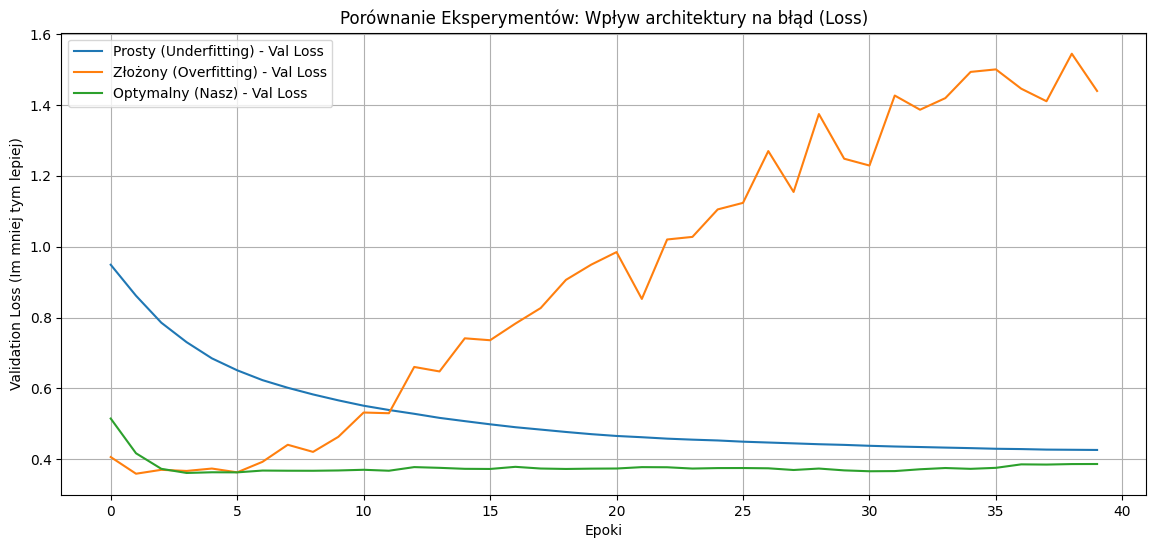

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

def create_model(type_name):
    model = Sequential()
    if type_name == 'Prosty (Underfitting)':

        model.add(Dense(4, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        model.add(Dense(1, activation='sigmoid'))

    elif type_name == 'Złożony (Overfitting)':

        model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

    elif type_name == 'Optymalny (Nasz)':

        model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

results = {}
models_list = ['Prosty (Underfitting)', 'Złożony (Overfitting)', 'Optymalny (Nasz)']

plt.figure(figsize=(14, 6))

for name in models_list:
    print(f"Trenowanie: {name}...")
    model = create_model(name)
    history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    results[name] = history

    plt.plot(history.history['val_loss'], label=f'{name} - Val Loss')


    print(f"\n--- WYNIKI DLA: {name} ---")
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    print(classification_report(y_test, y_pred))

plt.title('Porównanie Eksperymentów: Wpływ architektury na błąd (Loss)')
plt.xlabel('Epoki')
plt.ylabel('Validation Loss (Im mniej tym lepiej)')
plt.legend()
plt.grid(True)
plt.show()